In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [6]:
!pip install easydev    

Defaulting to user installation because normal site-packages is not writeable
  Using cached easydev-0.12.0.tar.gz (47 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64231 sha256=6d8cd44058c08c2708587a61a087b793dc11d320adcc5e60983a4abf56607939
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\91\1a\c5\9dfcc86c5bb27991b4dd27741dd03847dfca83ce975c186ddb
Successfully built easydev


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
!pip install colormap 

Defaulting to user installation because normal site-packages is not writeable
  Using cached colormap-1.0.4.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for colormap: filename=colormap-1.0.4-py3-none-any.whl size=15631 sha256=8ee90e2f50eb578c732bc7819eff6bbe7552332f8738789758a2f6dcbb5718cc
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\85\d0\c0\3ac513b77d6a3d9fdc8e5252f1a5abbcfd8f33a4f6dd8d5de4
Successfully built colormap


In [8]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)


In [9]:
!pip install colorgram.py 

Defaulting to user installation because normal site-packages is not writeable
  Using cached colorgram.py-1.2.0-py2.py3-none-any.whl (6.2 kB)


In [10]:
!pip install extcolors 

Defaulting to user installation because normal site-packages is not writeable
  Using cached extcolors-1.0.0-py3-none-any.whl (9.8 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:

import cv2
import extcolors

from colormap import rgb2hex

In [3]:
img_url=r'C:\Users\user\Desktop\1_sgg3kv_vAH3WDnqA-npA5g.webp'

In [4]:
def Resize_Img(input_name):
    #input_name = '<photo location/name>'
    output_width = 900                   #set the output size
    img = Image.open(input_name)
    wpercent = (output_width/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((output_width,hsize), Image.ANTIALIAS)

    #save
    resize_name =  input_name  #the resized image name
    img.save(resize_name)                 #output location can be specified before resize_name

    #read
    plt.figure(figsize=(9, 9))
    img_url = resize_name
    img = plt.imread(img_url)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5872\3343827772.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


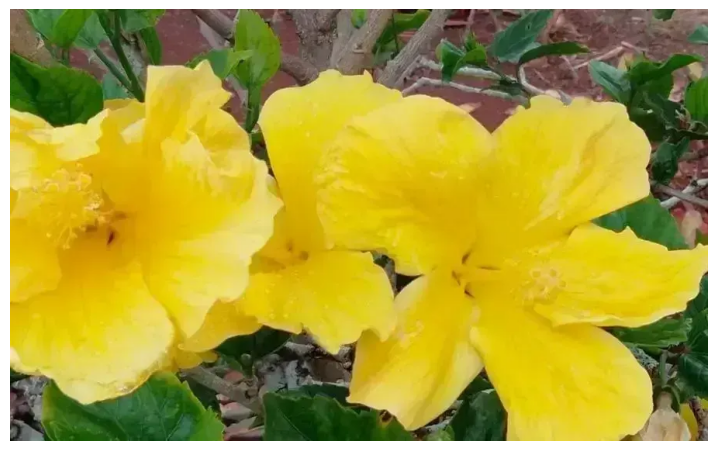

In [5]:
Resize_Img(img_url)

In [7]:
colors_x = extcolors.extract_from_path(img_url, tolerance = 12, limit = 12)
colors_x

([((219, 186, 1), 205089),
  ((234, 215, 108), 50230),
  ((107, 95, 88), 25315),
  ((17, 60, 2), 24961),
  ((113, 72, 70), 24661),
  ((51, 100, 6), 18414),
  ((29, 52, 24), 17986),
  ((228, 209, 63), 16444),
  ((219, 164, 0), 10070),
  ((62, 116, 50), 9490),
  ((70, 59, 44), 9227),
  ((230, 211, 6), 8785)],
 501300)

In [8]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(colors_x)
df_color

c_code occurence
0   #DBBA01    205089
1   #EAD76C     50230
2   #6B5F58     25315
3   #113C02     24961
4   #714846     24661
5   #336406     18414
6   #1D3418     17986
7   #E4D13F     16444
8   #DBA400     10070
9   #3E7432      9490
10  #463B2C      9227

# Donut chart



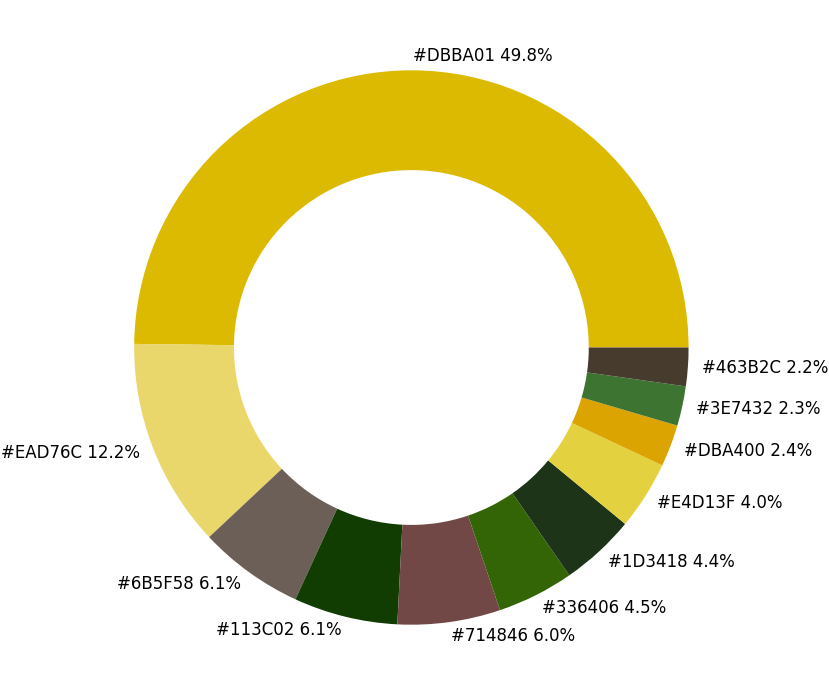

In [9]:
list_color = list(df_color['c_code'])
list_precent = [int(i) for i in list(df_color['occurence'])]
text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color,
                                                                               list_precent)]
fig, ax = plt.subplots(figsize=(90,90),dpi=10)
wedges, text = ax.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 120, 'color':'black'}
                     )
plt.setp(wedges, width=0.3)

#create space in the center
plt.setp(wedges, width=0.36)

ax.set_aspect("equal")
fig.set_facecolor('white')
plt.show()

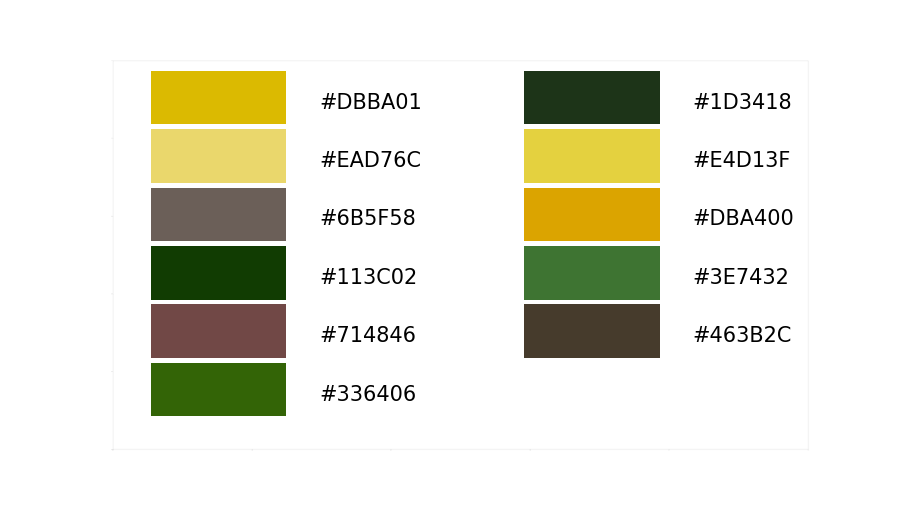

In [10]:
#create background color
fig, ax = plt.subplots(figsize=(192,108),dpi=10)
fig.set_facecolor('white')
plt.savefig('bg.png')
plt.close(fig)

#create color palette
bg = plt.imread('bg.png')
fig = plt.figure(figsize=(90, 90), dpi = 10)
ax = fig.add_subplot(1,1,1)

x_posi, y_posi, y_posi2 = 320, 25, 25
for c in list_color:
    if  list_color.index(c) <= 5:
        y_posi += 125
        rect = patches.Rectangle((x_posi, y_posi), 290, 115, facecolor = c)
        ax.add_patch(rect)
        ax.text(x = x_posi+360, y = y_posi+80, s = c, fontdict={'fontsize': 150})
    else:
        y_posi2 += 125
        rect = patches.Rectangle((x_posi + 800, y_posi2), 290, 115, facecolor = c)
        ax.add_artist(rect)
        ax.text(x = x_posi+1160, y = y_posi2+80, s = c, fontdict={'fontsize': 150})
        
ax.axis('off')
plt.imshow(bg)
plt.tight_layout()

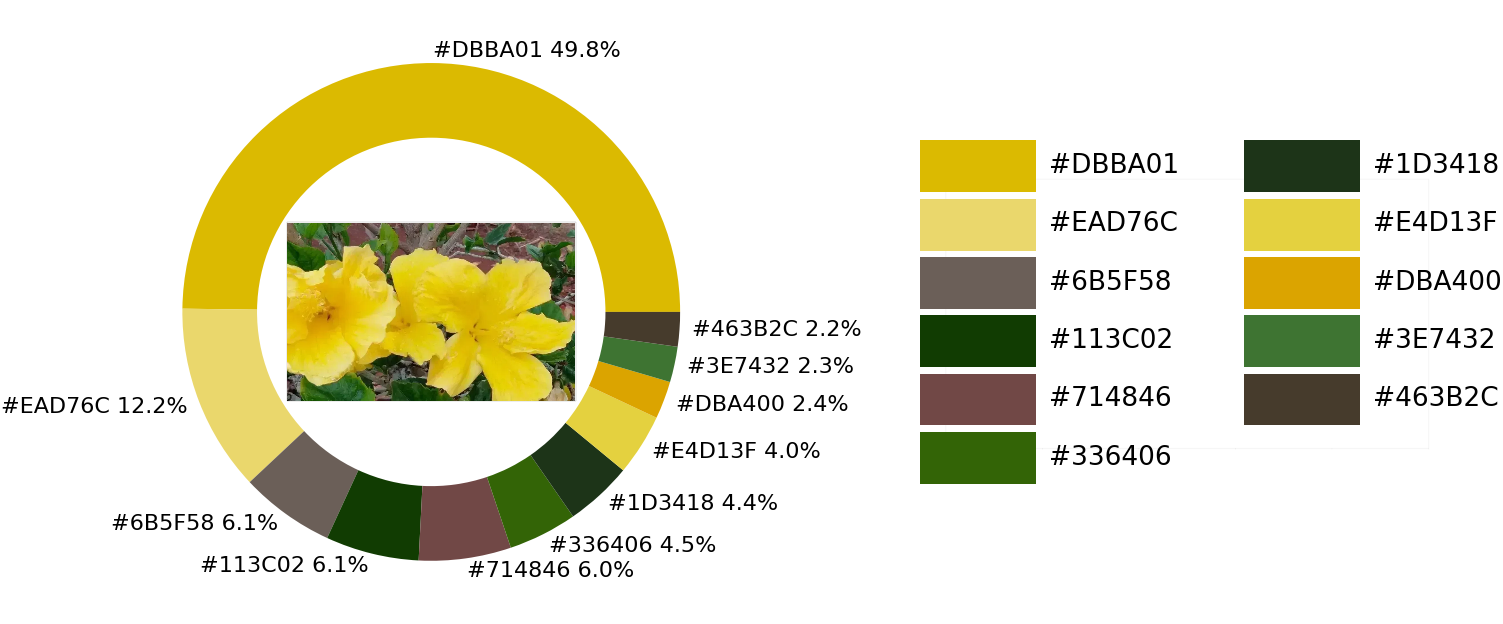

In [11]:
img = mpimg.imread(img_url)
bg = plt.imread('bg.png')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

#donut plot
wedges, text = ax1.pie(list_precent,
                      labels= text_c,
                      labeldistance= 1.05,
                      colors = list_color,
                      textprops={'fontsize': 160, 'color':'black'})
plt.setp(wedges, width=0.3)

#add image in the center of donut plot
imagebox = OffsetImage(img, zoom=2.3)
ab = AnnotationBbox(imagebox, (0, 0))
ax1.add_artist(ab)

#color palette
x_posi, y_posi, y_posi2 = 160, -170, -170
for c in list_color:
    if list_color.index(c) <= 5:
        y_posi += 180
        rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
        ax2.add_patch(rect)
        ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
    else:
        y_posi2 += 180
        rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
        ax2.add_artist(rect)
        ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

ax2.axis('off')
fig.set_facecolor('white')
plt.imshow(bg)       
plt.tight_layout()

In [12]:
# construct the argument parser and parse the arguments
def Img_Color_to_histogram(img_url):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(img_url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # cluster the pixel intensities
    clt = KMeans(n_clusters =5)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()

In [153]:
def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
        wpercent = (output_width/float(img.size[0]))
        hsize = int((float(img.size[1])*float(wpercent)))
        img = img.resize((output_width,hsize), Image.ANTIALIAS)
        resize_name =  input_image
        img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name
    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' 
              for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(140,100), dpi = 10)
    
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 130, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    Img_Colot_to_histogram(img_url)
    
    return plt.show()

In [17]:
#Import Libraries:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

In [ ]:
# import the necessary packages
import numpy as np
import cv2
def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    # return the histogram
    return hist

In [ ]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar


In [ ]:
# import the necessary packages
import numpy as np
import cv2

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    # return the histogram
    return hist

In [20]:
def plot_colors(hist, centroids):
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0

    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

In [14]:
#exact_color('image name', resized_width, tolerance, zoom)


In [146]:
img_url=r'C:\Users\user\Desktop\1_sgg3kv_vAH3WDnqA-npA5g.webp'

C:\Users\user\AppData\Local\Temp\ipykernel_5872\2544999417.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


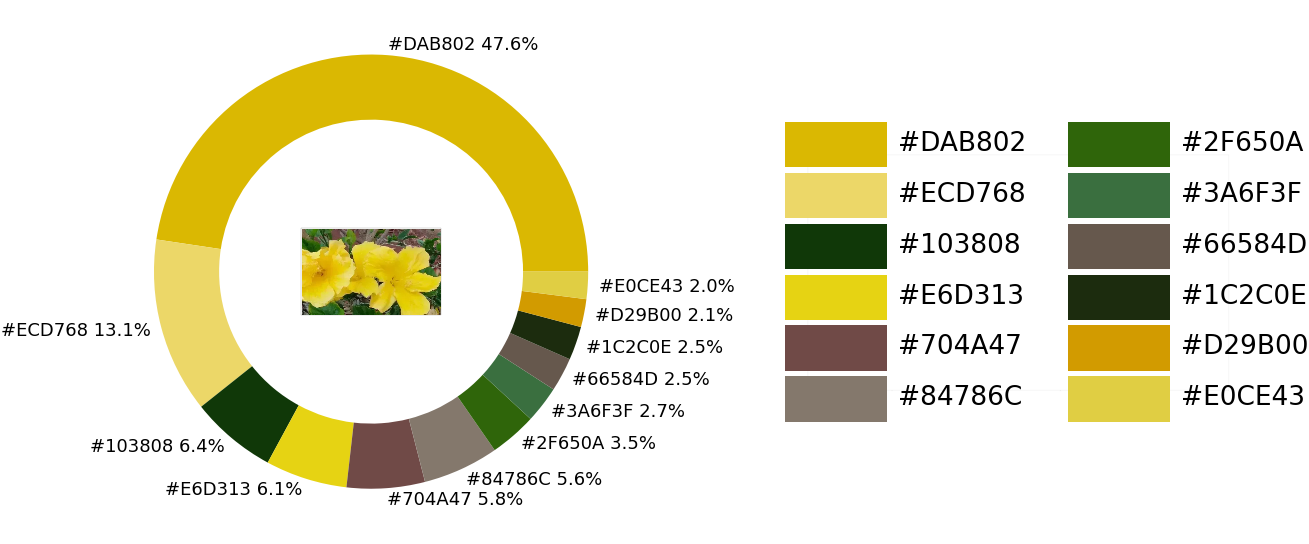

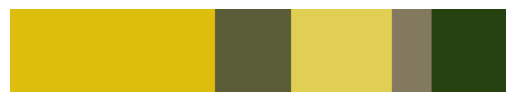

In [154]:
exact_color(img_url, 400, 12, 2.5)
#Img_Colot_to_histogram(img_url)

C:\Users\user\AppData\Local\Temp\ipykernel_3912\2563838183.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


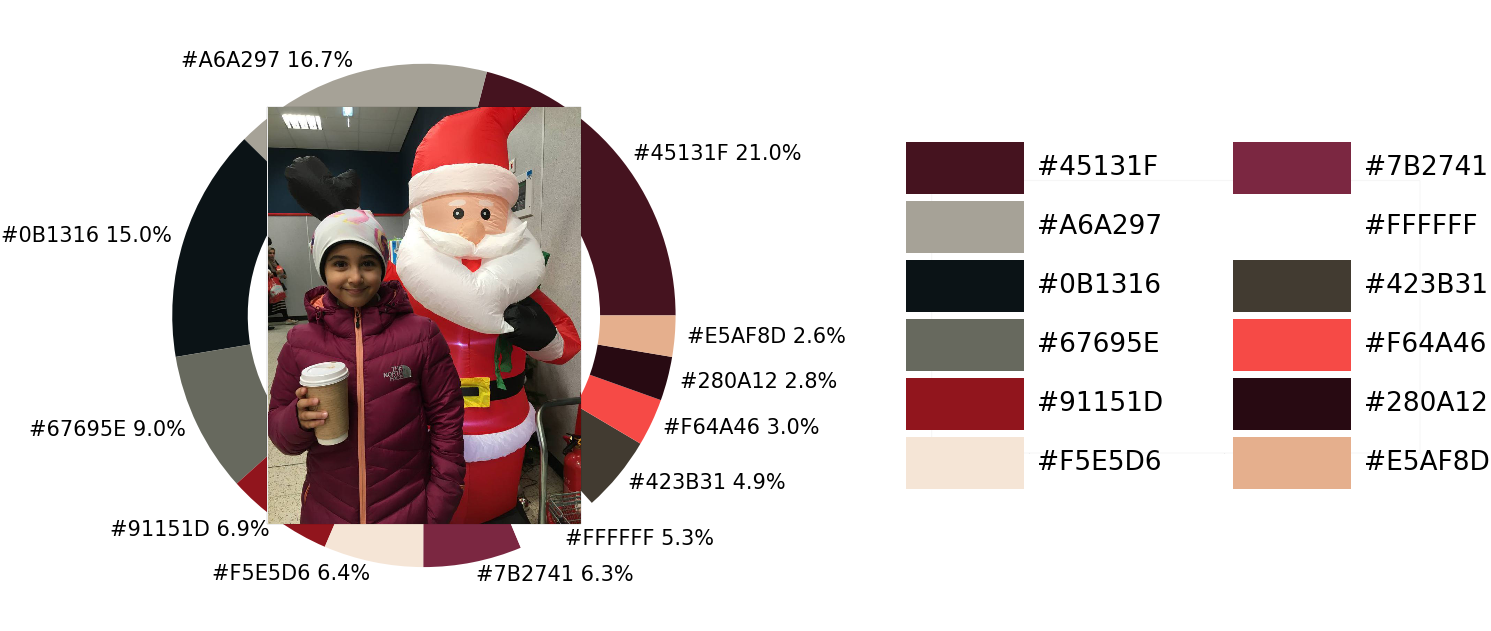

(None,
 ['#45131F',
  '#A6A297',
  '#0B1316',
  '#67695E',
  '#91151D',
  '#F5E5D6',
  '#7B2741',
  '#FFFFFF',
  '#423B31',
  '#F64A46',
  '#280A12',
  '#E5AF8D'])

In [22]:

img_url1=r'C:\Users\user\Desktop\yasi bayati\yasi-2.jpg'
exact_color(img_url1, 900, 12, 2.5)

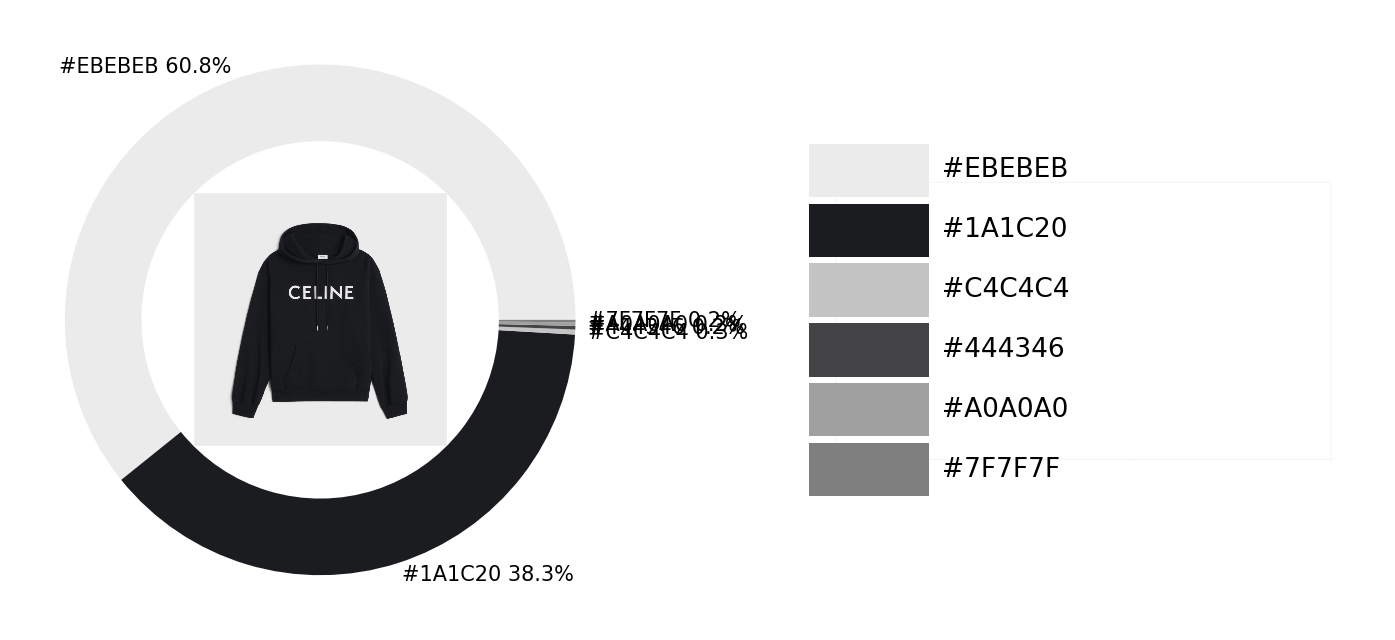

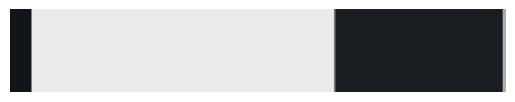

In [24]:

img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\2Y321670Q.38AW_1_SUM21_V10.webp'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

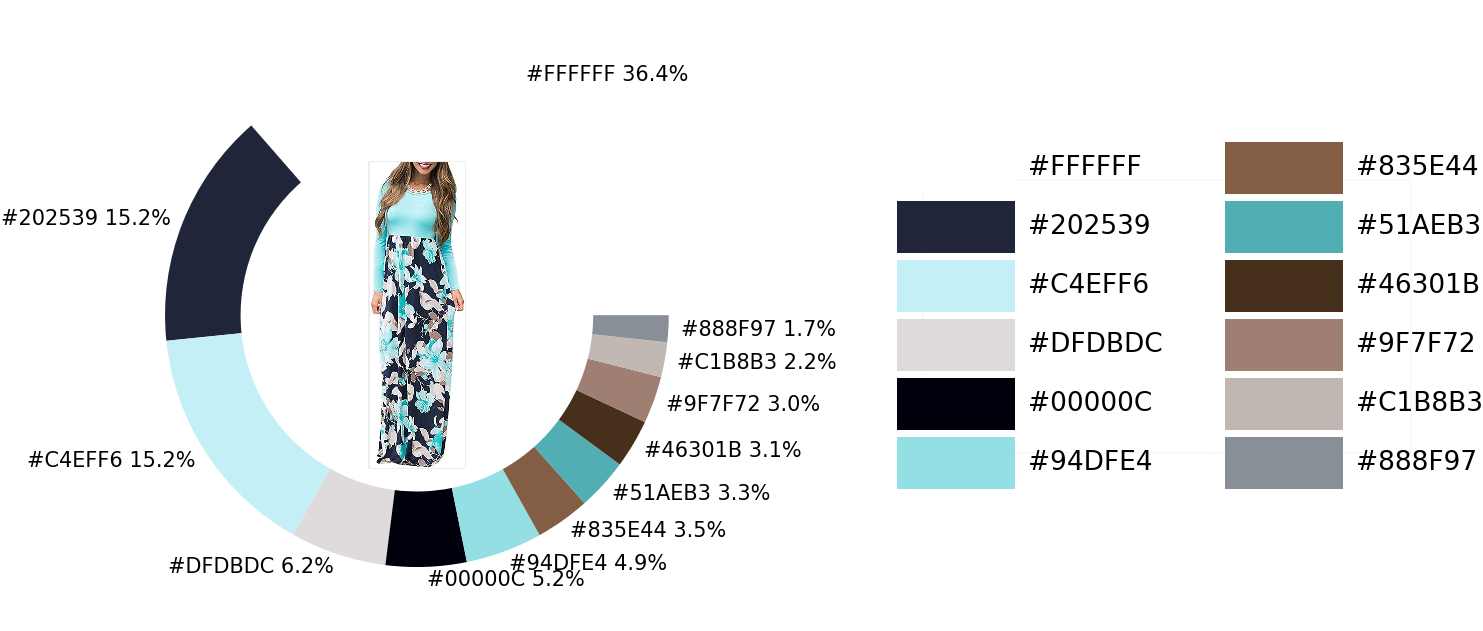

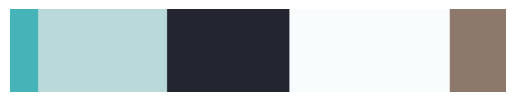

In [25]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\61Zj7FnsTTL._AC_UY879_.jpg'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

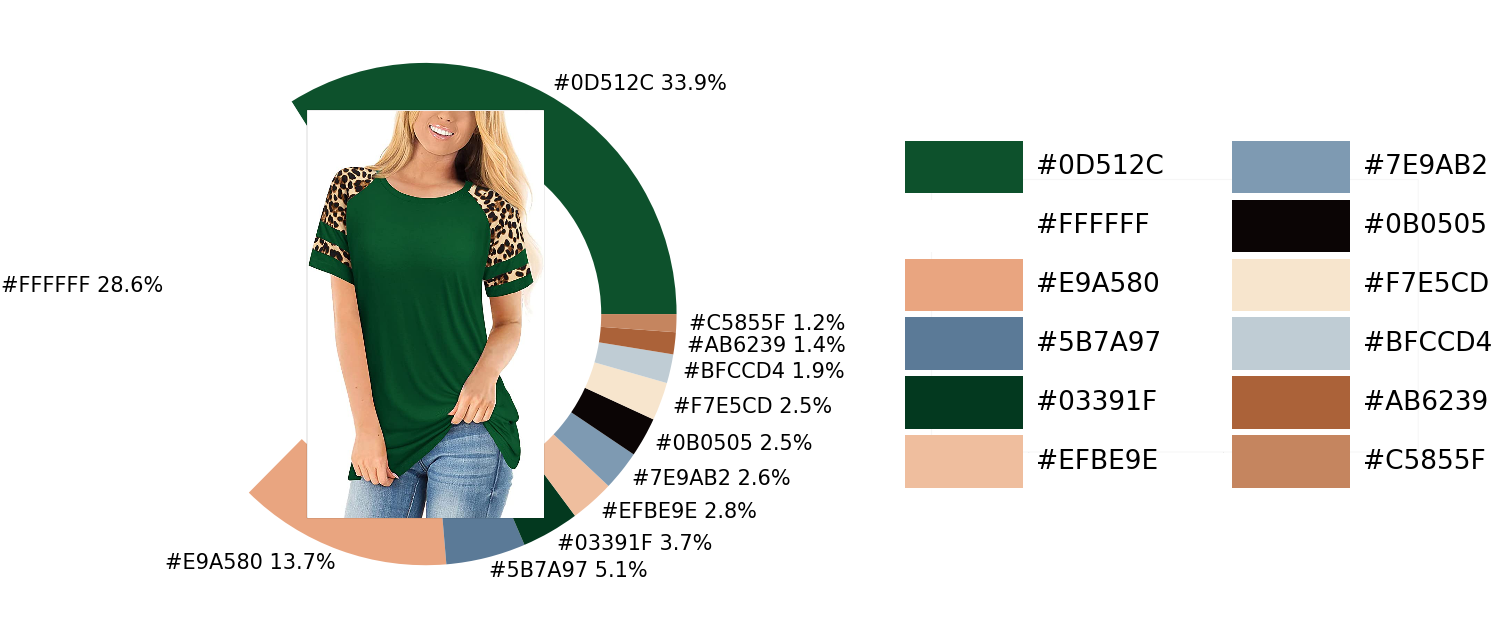

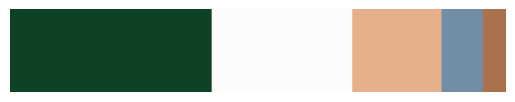

In [137]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\61QopiIKeKS._AC_UX679_.jpg'
exact_color(img_url1, 900, 12, 2.5)
#Img_Colot_to_histogram(img_url1)

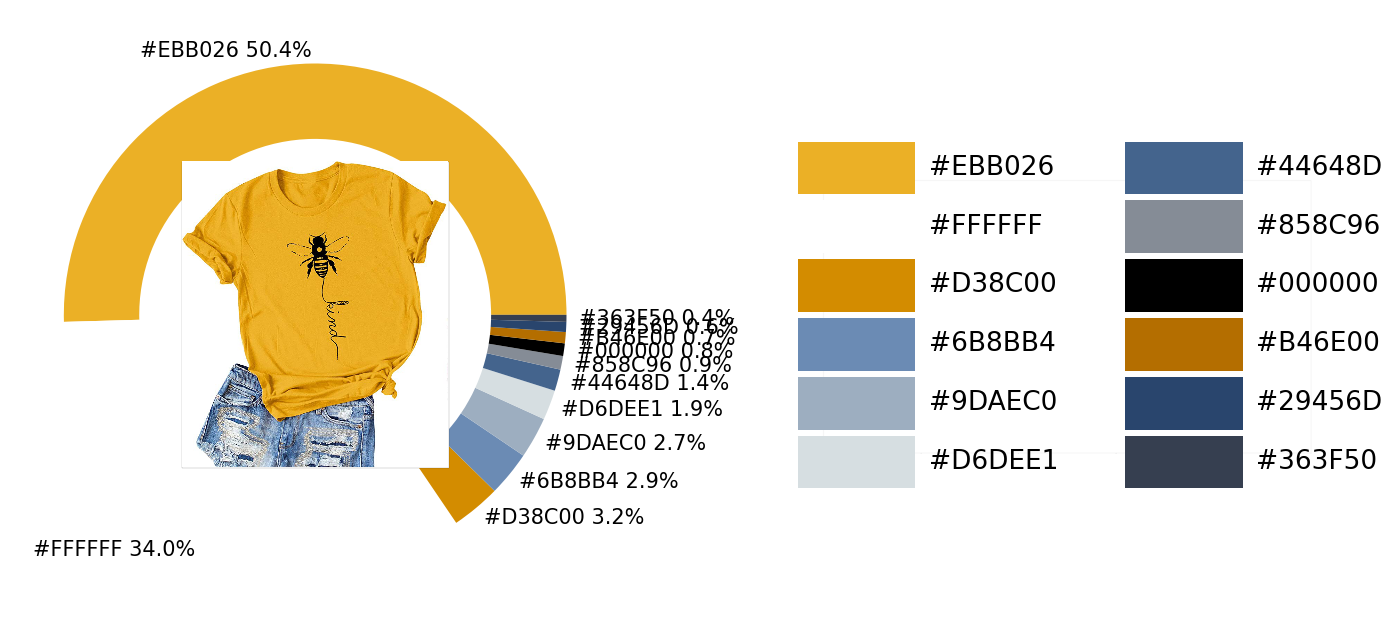

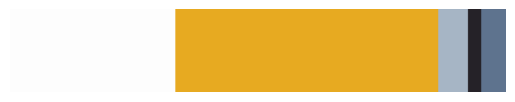

In [27]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71mb3NvNJGL._AC_UY879_.jpg'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

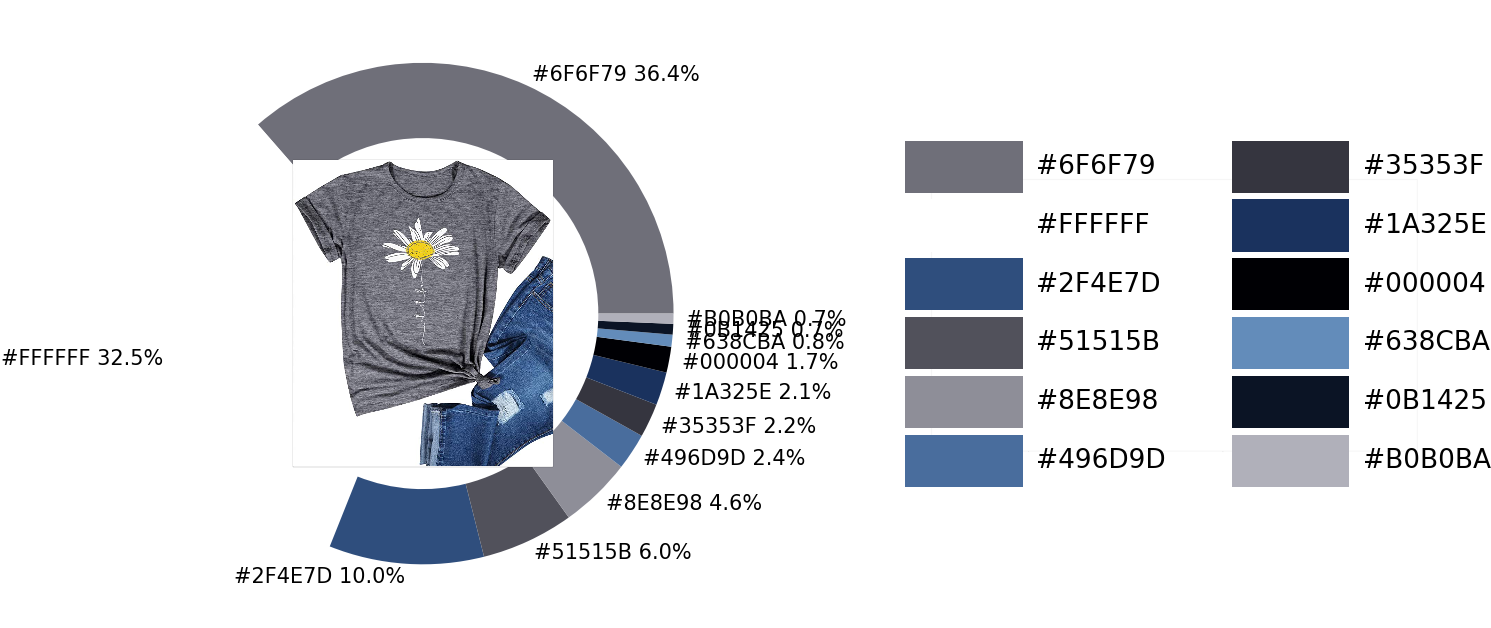

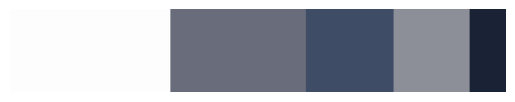

In [28]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\81OH4NsGo2L._AC_UY879_.jpg'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

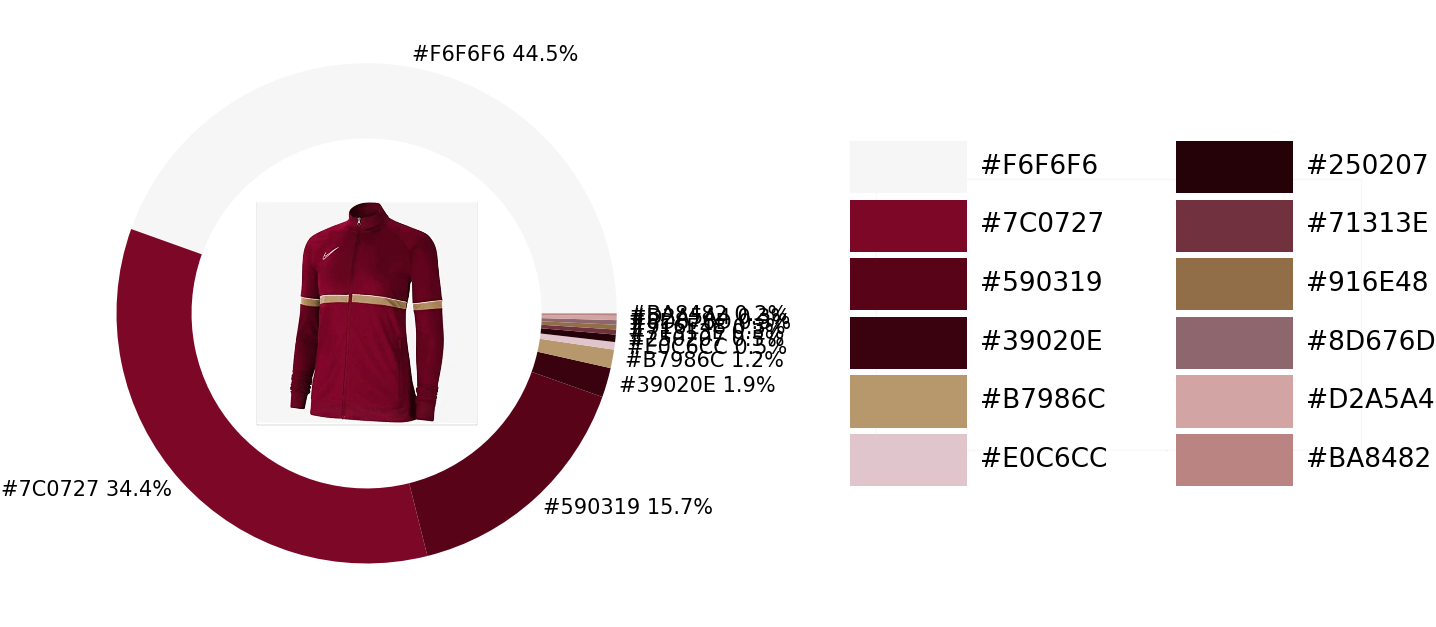

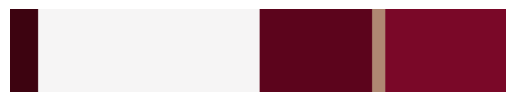

In [29]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\41vEFHPtvaL._AC_UL640_FMwebp_QL65_.webp'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

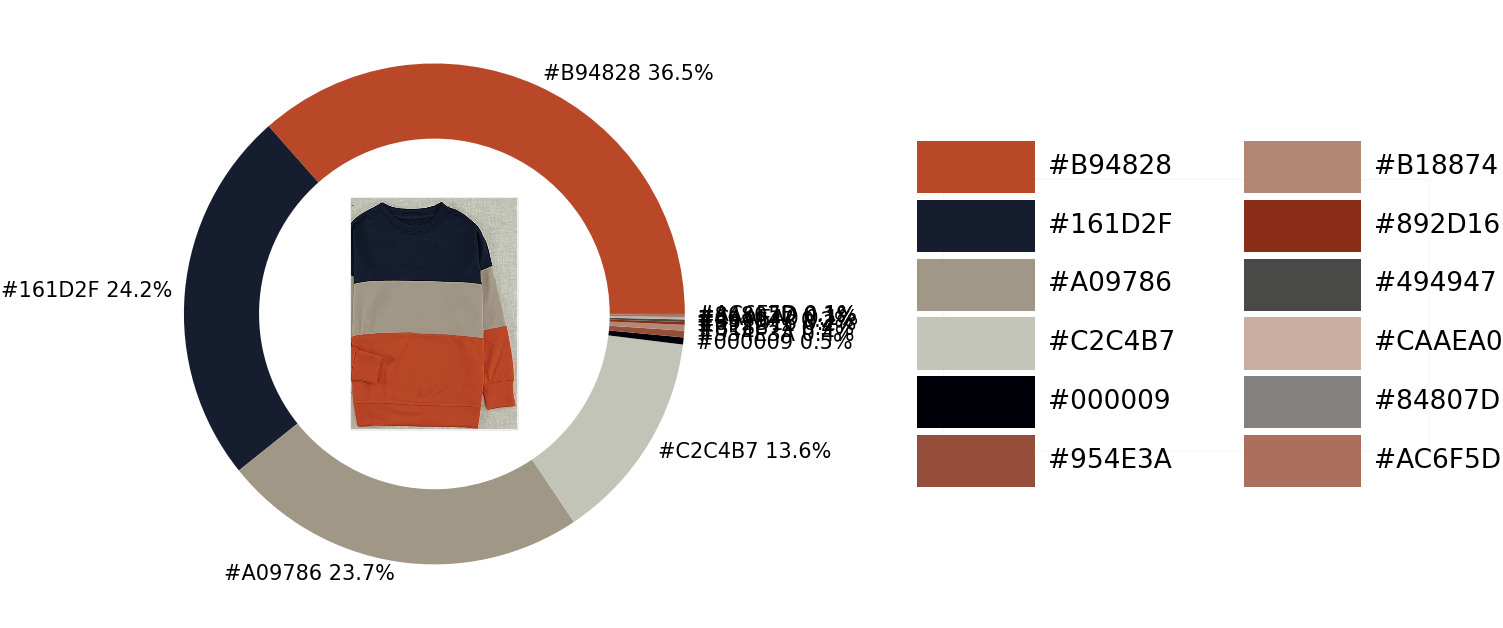

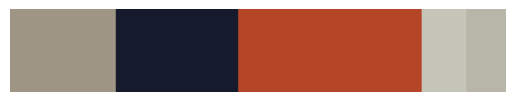

In [30]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)

In [50]:
def rgb_to_hex(r, g, b):
  return ('{:X}{:X}{:X}').format(r, g, b)

print(rgb_to_hex(21,  27  ,44))

151B2C


In [42]:
def color_KMeans(img_url):
    img=cv2.imread(img_url)
    #plt.imshow(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=5)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    #print(labels)
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    print(centroid)
    percent=[]
    final_result=[]
    colors=np.array(centroid/255)
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
      final_result.append(''+str(colors[i])+','+str(round(j,2)))
    print(percent)
    print(final_result)
    #plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)), autopct='%1.1f%%', explode=[0.1,0,0,0,0], shadow=True, startangle=90)
    #plt.legend(loc="upper left")
    #plt.show()
    #Img_Colot_to_histogram(img_url)

In [74]:
import numpy as np
from PIL import Image 
def distinct_colors(img_url):
    """Return the distinct colors found in img.
    img must be an Image object (from the Python Imaging Library).
    The result is a Numpy array with three columns containing the
    red, green and blue values for each distinct color.

    """
    img=cv2.imread(img_url)
    im = Image.open(img_url).convert("L") 
    # getting colors 
    # multiband images (RBG) 
    im1 = Image.Image.getcolors(im) 
    #width, height = img.size
    colors = [rgb for _, rgb in Image.Image.getcolors(im)]
    return np.array(colors, dtype=np.uint8)
    #return im1

In [76]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
distinct_colors(img_url)
colors = distinct_colors(img_url)
colors
rgb2lab(colors.reshape((1, -1, 3)))

NameError: name 'rgb2lab' is not defined

In [97]:
# Import Module
from PIL import Image
codecolor=''
def most_common_used_color(img):
    # Get width and height of Image
    width, height = img.size
 
    # Initialize Variable
    r_total = 0
    g_total = 0
    b_total = 0
 
    count = 0
 
    # Iterate through each pixel
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = img.getpixel((x, y))
 
            r_total += r
            g_total += g
            b_total += b
            count += 1
 
    codecolor1=str(int(round(r_total/count,0)))
    codecolor2=str(int(round(g_total/count,0)))
    codecolor3=str(int(round(b_total/count,0)))
    codecolor=''+codecolor1+','+codecolor2,+','+codecolor3
    print(codecolor)
    return (int(round(r_total/count,0)), int(round(g_total/count,0)), int(round(b_total/count,0)))
 
def rgb_to_hex(r, g, b):
  return ('{:X}{:X}{:X}').format(r, g, b)



In [98]:
# Read Image
img = Image.open(r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg')
 
# Convert Image into RGB
img = img.convert('RGB')
 
# call function
common_color = most_common_used_color(img)
 
print(common_color)
print(rgb_to_hex(codecolor))
print(rgb_to_hex(139, 97, 84))
# Output is (R, G, B)

TypeError: bad operand type for unary +: 'str'

In [55]:
from PIL import Image
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
img = Image.open(img_url)

max_colors = 256

print(img.getcolors(max_colors))

None


In [23]:
def exact_color_KMeans(img_url):
    img=cv2.imread(img_url)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=5)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid))
            , autopct='%1.1f%%', explode=[0.1,0,0,0,0], shadow=True, startangle=90)
    plt.legend(loc="upper left")
    plt.show()
    Img_Colot_to_histogram(img_url)

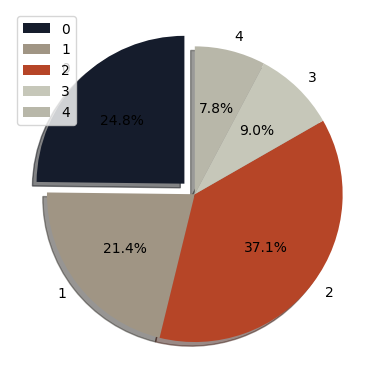

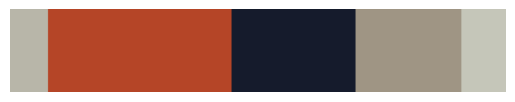

In [24]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
exact_color_KMeans(img_url)

In [ ]:
exact_color_KMeans(img_url)

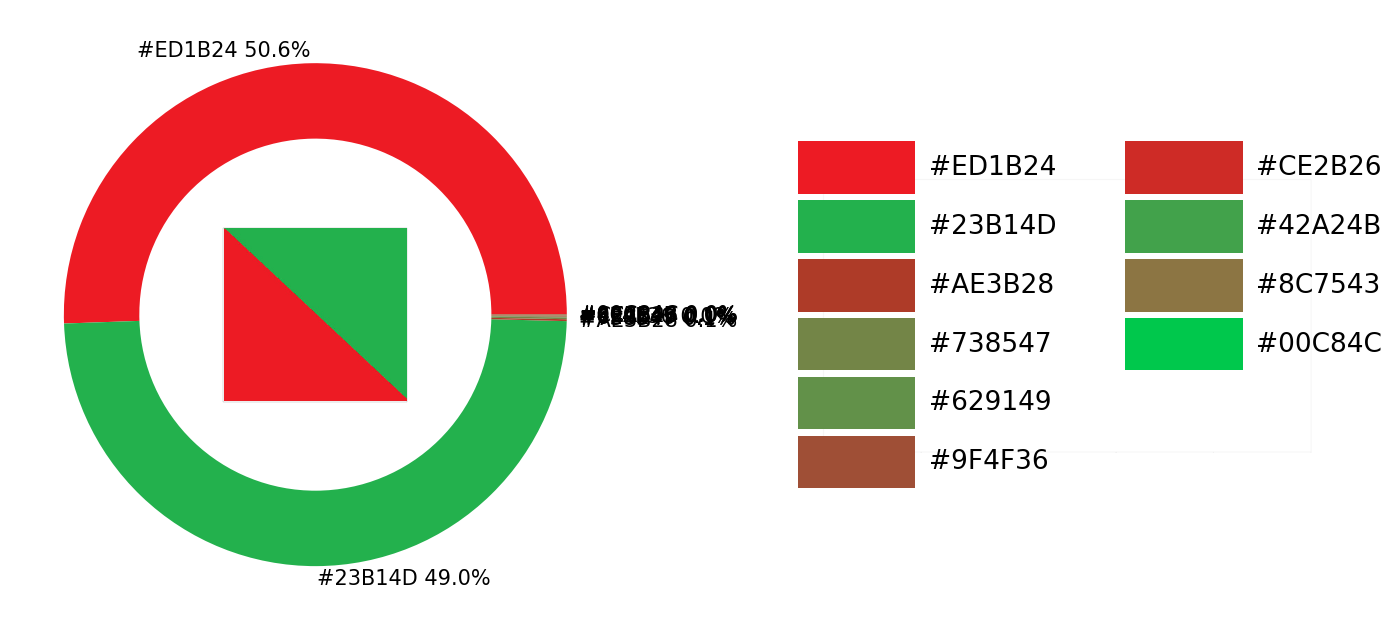

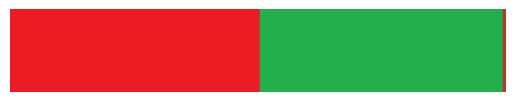

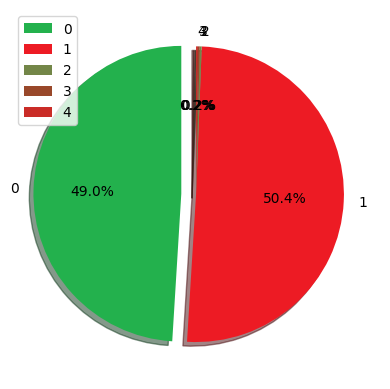

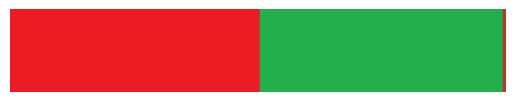

In [27]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\base.jpg'
exact_color(img_url1, 900, 12, 2.5)
Img_Colot_to_histogram(img_url1)
#exact_color_KMeans(img_url1)

------------------------------------------------

# Color detection using KMeans Clustering

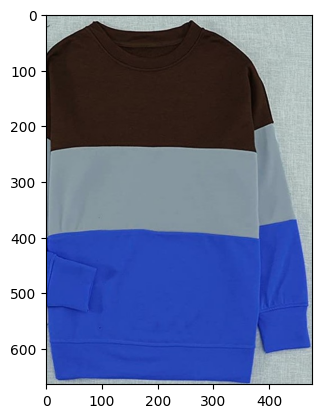

In [32]:
#2. Loading Image:-


img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
img=cv2.imread(img_url)
plt.imshow(img)

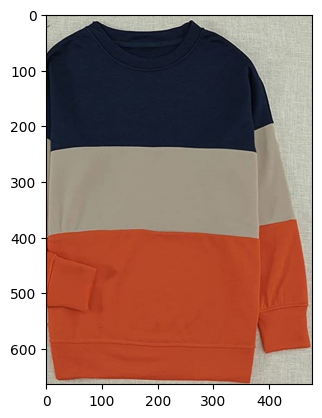

In [33]:
#3. Converting from BGR to RGB:-


img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
#4. Reshaping the image:-


img=img.reshape((img.shape[1]*img.shape[0],3))

In [35]:
#5. Implementing the KMeans Algorithm:-

kmeans=KMeans(n_clusters=5)
s=kmeans.fit(img)

In [36]:
#6. Determining Labels:-
labels=kmeans.labels_
print(labels)
labels=list(labels)

[3 3 3 ... 3 3 3]


In [37]:
#7. Determining Centroids of Clusters:-

centroid=kmeans.cluster_centers_
print(centroid)


[[ 21.07240451  27.92049726  44.34142625]
 [159.55078551 149.27335161 132.47888113]
 [181.9965192   69.35038926  39.20693783]
 [197.96638381 198.8839208  185.75174064]
 [184.64883364 182.94449471 169.55973408]]


In [38]:
#8. Calculating the Percentages:-

percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
print(percent)


[0.24812219589655693, 0.2136947371074255, 0.3711152139940515, 0.08927761254221908, 0.07779024045974693]


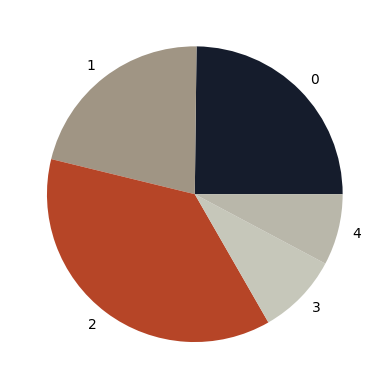

In [39]:
#9. Plotting a Pie chart:-
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()


#Elbow Method:-
The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [40]:

md=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(img)
  o=kmeans.inertia_
  md.append(o)
print(md)
#The output of the above code is inertia value for each k from 1 to 20 values.



[3643555956.867081, 1493390207.8564134, 189469605.9367376, 45206508.432374835, 36666668.29433727, 32147705.52190582]


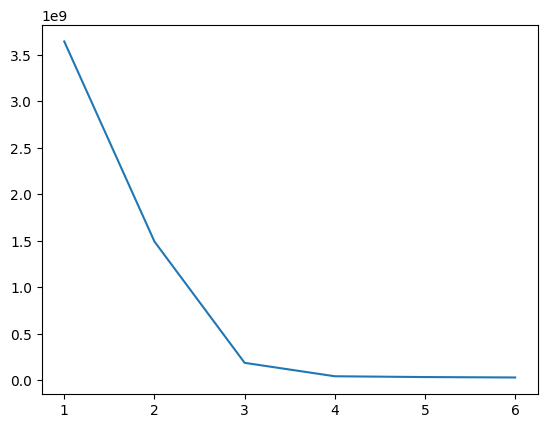

In [41]:
#Plotting the inertia values with respect to each k as the graph.


plt.plot(list(np.arange(1,7)),md)
plt.show()
#Here from any k onwards in the above plot the there is no significant change in the value of inertia. So the elbow point is k=?.

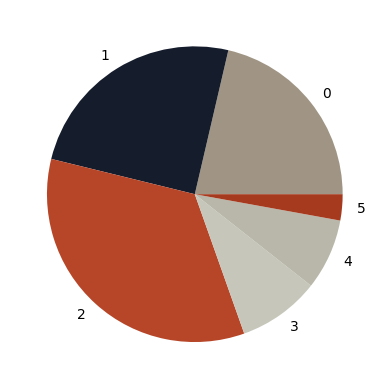

In [42]:
means=KMeans(n_clusters=3)
s=kmeans.fit(img)
labels=kmeans.labels_
centroid=kmeans.cluster_centers_
labels=list(labels)
percent=[]
for i in range(len(centroid)):
  j=labels.count(i)
  j=j/(len(labels))
  percent.append(j)
plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)))
plt.show()

In [55]:
def exact_color_KMeans(img_url):
    img=cv2.imread(img_url)
    #plt.imshow(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=5)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    #print(labels)
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    #print(centroid)
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    #print(percent)
    plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)), autopct='%1.1f%%', explode=[0.1,0,0,0,0], shadow=True, startangle=90)
    plt.legend(loc="upper left")
    plt.show()
    Img_Colot_to_histogram(img_url)
    #print(np.array(centroid/255))
    

In [113]:
centroid

array([[182.04434437,  69.26484885,  39.09644411],
       [184.46815807, 182.72387329, 169.35589484],
       [ 20.99684703,  27.85167057,  44.29264138],
       [160.24510682, 150.41400654, 133.56023092],
       [197.75535061, 198.66882568, 185.51802309],
       [145.85423066, 122.90226194, 107.31192404]])

In [48]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', [')[0:-1]
    df_rgb = [i.split('], ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('], ')[1].replace('[]','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("[","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace("[",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

df_color = color_to_df(centroid)
df_color

Empty DataFrame
Columns: [c_code, occurence]
Index: []

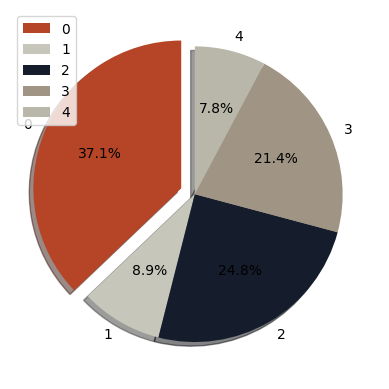

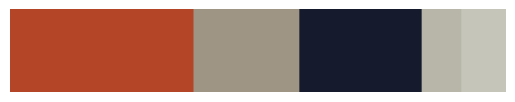

In [56]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
exact_color_KMeans(img_url)


---------------------------------

In [119]:
#pip install utils

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import argparse
import utils
import cv2

In [ ]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'


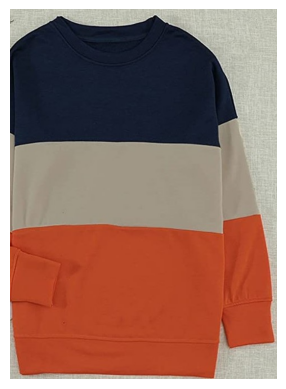

In [124]:

# construct the argument parser and parse the arguments

# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib
image = cv2.imread(img_url)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [125]:
# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [130]:
# cluster the pixel intensities
clt = KMeans(n_clusters =2)
clt.fit(image)

KMeans(n_clusters=2)

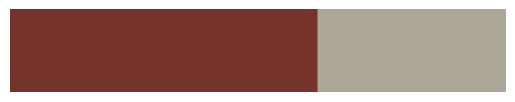

In [137]:
# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)
# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

In [143]:

# construct the argument parser and parse the arguments
def Img_Colot_to_histogram(img_url):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(img_url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # cluster the pixel intensities
    clt = KMeans(n_clusters =5)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    

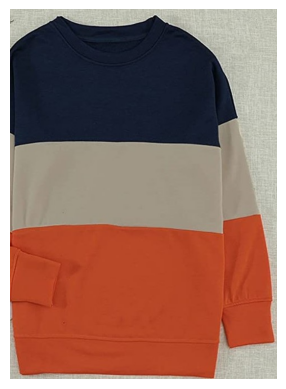

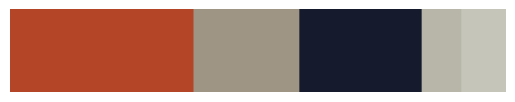

In [144]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71ox1h8gd5L._AC_UY879_1.jpg'
Img_Colot_to_histogram(img_url)

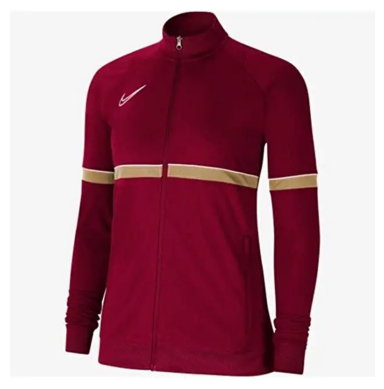

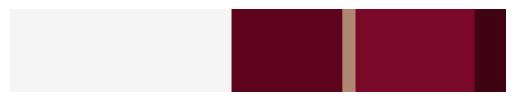

In [145]:
img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\41vEFHPtvaL._AC_UL640_FMwebp_QL65_.webp'
Img_Colot_to_histogram(img_url)

In [103]:
from PIL import Image

img_url=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\41vEFHPtvaL._AC_UL640_FMwebp_QL65_.webp'
#Image.open(img_url).getcolors() => a list of (count, color) tuples or None
im = Image.open(img_url)
from collections import defaultdict
by_color = defaultdict(int)
for pixel in im.getdata():
    by_color[pixel] += 1
by_color
#defaultdict(<type 'int'>, {(11, 24, 41): 8, (53, 52, 58): 8, (142, 147, 117): 1, (121, 111, 119): 1, (234, 228, 216): 4

defaultdict(int,
            {(253, 253, 253): 326,
             (254, 254, 254): 317,
             (255, 255, 255): 2616,
             (255, 254, 255): 152,
             (253, 255, 255): 60,
             (252, 255, 255): 17,
             (250, 255, 255): 9,
             (252, 251, 252): 209,
             (253, 251, 252): 75,
             (251, 253, 253): 171,
             (249, 254, 253): 4,
             (254, 252, 253): 71,
             (253, 253, 251): 50,
             (251, 254, 251): 71,
             (252, 255, 252): 138,
             (255, 253, 254): 145,
             (255, 252, 255): 42,
             (255, 253, 255): 103,
             (254, 253, 255): 6,
             (252, 254, 255): 42,
             (252, 255, 254): 320,
             (255, 252, 254): 69,
             (255, 251, 253): 90,
             (255, 250, 252): 82,
             (254, 249, 250): 46,
             (255, 249, 252): 69,
             (255, 251, 254): 28,
             (255, 249, 253): 37,
             (255, 248,

In [106]:
colors = img.convert('RGB').getcolors() #this converts the mode to RGB
colors

In [109]:
!pip install colorthief

Defaulting to user installation because normal site-packages is not writeable


In [110]:
from colorthief import ColorThief

color_thief = ColorThief(img_url)
# get the dominant color
dominant_color = color_thief.get_color(quality=1)
# build a color palette
palette = color_thief.get_palette(color_count=6)

In [111]:
palette

[(243, 242, 242),
 (106, 8, 34),
 (181, 147, 106),
 (42, 4, 10),
 (190, 130, 149),
 (192, 124, 123)]

In [122]:
# construct the argument parser and parse the arguments
def Img_Color_to_histogram2(img_url):
    #fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)

    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(img_url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    plt.imshow(image)
    # cluster the pixel intensities
    clt = KMeans(n_clusters =5)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    # show our color bart
    

    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
    
    
    
    
    
    
    


In [131]:
def exact_color_KMeans2(img_url):
    img=cv2.imread(img_url)
    #plt.imshow(img)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    img=img.reshape((img.shape[1]*img.shape[0],3))
    kmeans=KMeans(n_clusters=5)
    s=kmeans.fit(img)
    labels=kmeans.labels_
    #print(labels)
    labels=list(labels)
    centroid=kmeans.cluster_centers_
    #print(centroid)
    
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(img)
    #img = img.reshape((img.shape[0] * img.shape[1], 3))
    
    percent=[]
    for i in range(len(centroid)):
      j=labels.count(i)
      j=j/(len(labels))
      percent.append(j)
    #print(percent)
    plt.pie(percent,colors=np.array(centroid/255),labels=np.arange(len(centroid)), autopct='%1.1f%%', explode=[0.1,0,0,0,0], shadow=True, startangle=90)
    plt.legend(loc="upper left")
    plt.show()
    Img_Colot_to_histogram(img_url)

In [123]:
img_url1=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\61Zj7FnsTTL._AC_UY879_.jpg'
img_url2=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\41vEFHPtvaL._AC_UL640_FMwebp_QL65_.webp'
img_url3=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\81OH4NsGo2L._AC_UY879_.jpg'
img_url4=r'C:\Uni_doc\Big Data\Assignment2\Colour Detection\img\71mb3NvNJGL._AC_UY879_.jpg'
#plt.imshow(img)


C:\Users\user\AppData\Local\Temp\ipykernel_5872\2544999417.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


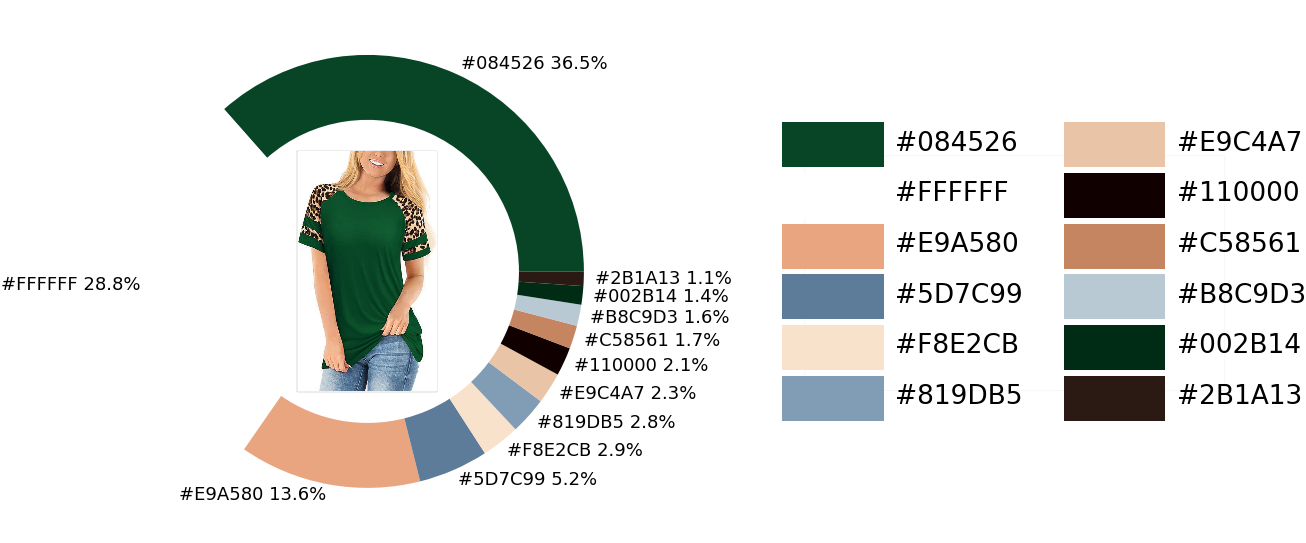

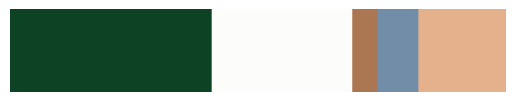

In [158]:
exact_color(img_url1,400, 12, 2.5)

C:\Users\user\AppData\Local\Temp\ipykernel_5872\2544999417.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


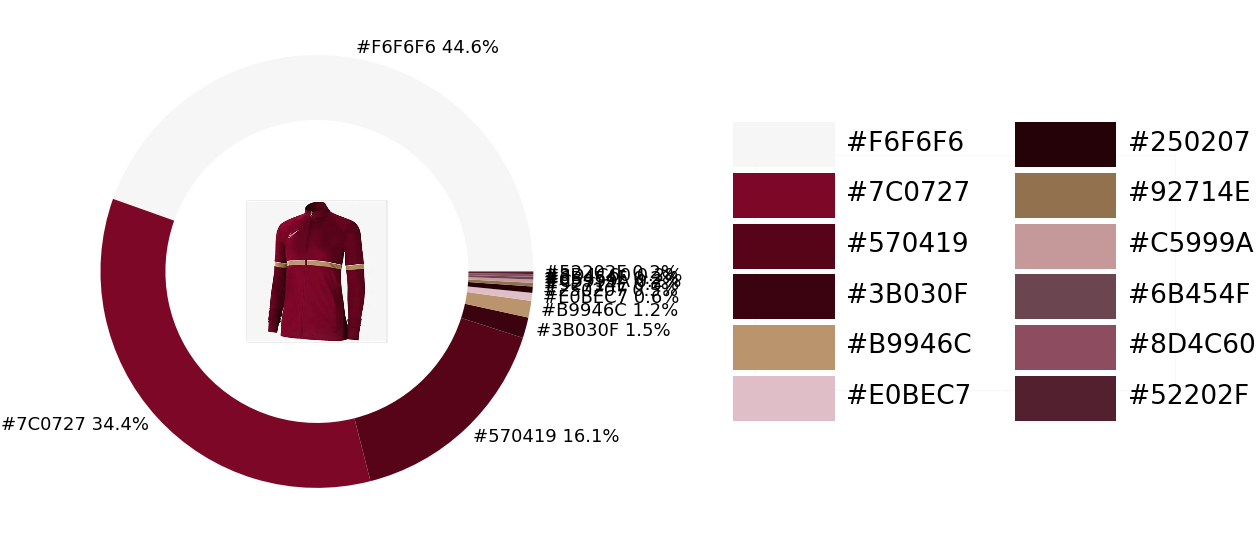

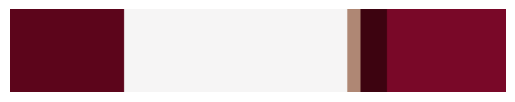

In [159]:
exact_color(img_url2,400, 12, 2.5)

C:\Users\user\AppData\Local\Temp\ipykernel_5872\2544999417.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


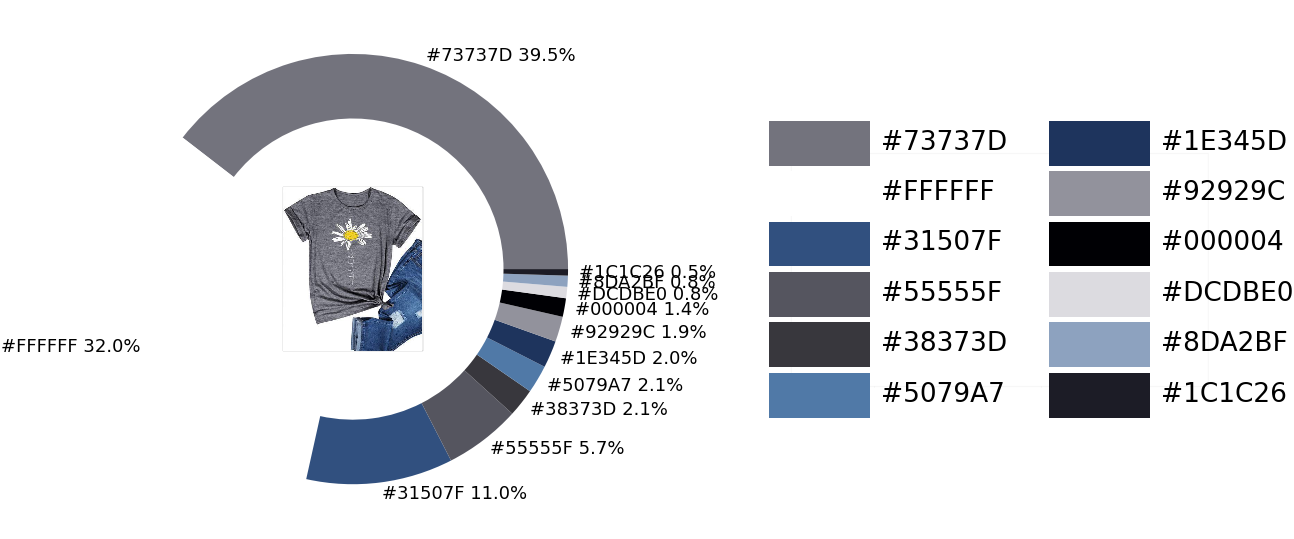

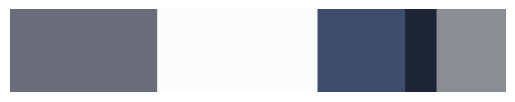

In [160]:
exact_color(img_url3,400, 12, 2.5)

C:\Users\user\AppData\Local\Temp\ipykernel_5872\2544999417.py:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


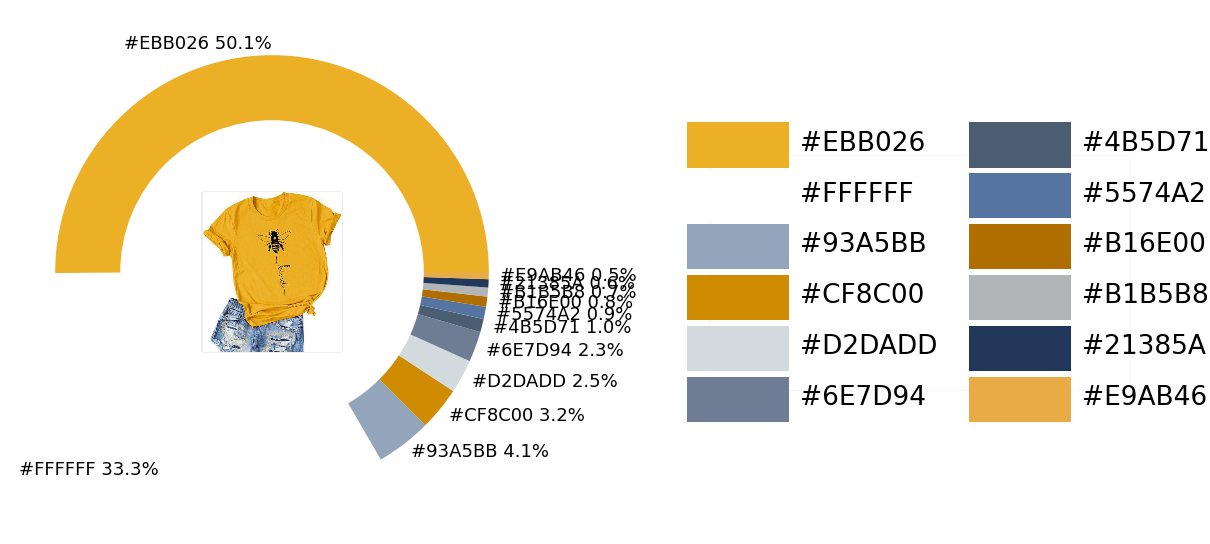

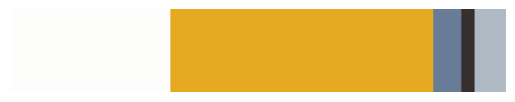

In [161]:
exact_color(img_url4,400, 12, 2.5)

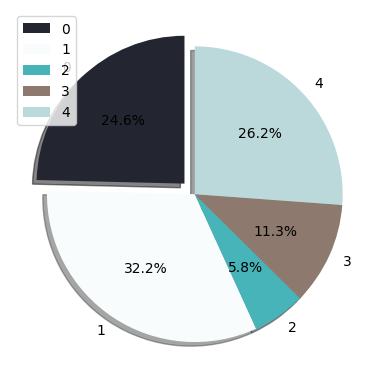

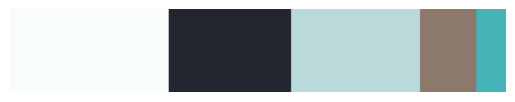

In [114]:
exact_color_KMeans(img_url1)

In [133]:

# construct the argument parser and parse the arguments
def Img_Colot_to_histogram3(img_url):
    # load the image and convert it from BGR to RGB so that
    # we can dispaly it with matplotlib
    image = cv2.imread(img_url)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    # cluster the pixel intensities
    clt = KMeans(n_clusters =5)
    clt.fit(image)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()